# Polynominální regrese

## Úkol

- Načtěte dataset s velikostmi a cenami
- Prozkoumejte a zobrazte data
- Vytvořte lineární model a zjistětě jaho R2
- Vytvořte polynomiální modely s různým stupni, zjistěte jejich R2
- Vyberte nejlepší model 

# Načtení dat

In [120]:
import pandas as pd 

In [121]:
data = pd.read_csv ("..\dataset\prices.csv",  sep=';')

In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [124]:
# Zobrazení prvních pěti řádků datasetu
print(data.head())

# Zobrazení základních statistik datasetu
print(data.describe())


        Size       Price
0   51.00000   901.18810
1   70.36735   972.23867
2   89.73469  1001.99394
3  109.10204  1024.90830
4  128.46939  1053.72491
              Size        Price
count    62.000000    62.000000
mean    641.704081  1327.839685
std     349.418285   148.292994
min      51.000000   901.188100
25%     346.352037  1241.288570
50%     641.704085  1358.216850
75%     937.056123  1447.718920
max    1232.408156  1527.818240


# Lineární model
- standardizujte data
- vytvořte a natrénujte lineární model
- zobrazte parametry modelu
- vizualizujte lineární model
- zobrazte skóre modelu

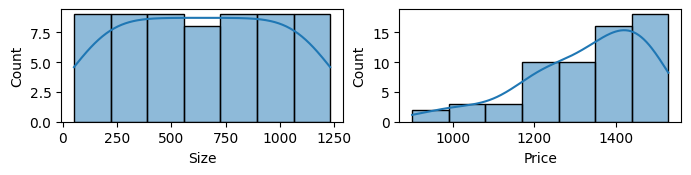

In [125]:
# Data před standardizací
pos = 1
fig = plt.figure(figsize=(8, 12))
for i in data.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data[i],ax=ax, kde=True)

In [126]:
# Z-standardization
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [127]:
# Vytvoření nového datasetu se standardizovanými proměnnými
data_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_std[i] = rescale(data[i])

In [128]:
# Popis nových proměnných
data_std.describe()

,Size,Price
count,6.200000e+01,6.200000e+01
mean,3.187414e-16,-2.467560e-15
std,1.000000e+00,1.000000e+00
min,-1.690536e+00,-2.877085e+00
25%,-8.452679e-01,-5.836494e-01
50%,1.186304e-08,2.048456e-01
75%,8.452678e-01,8.083945e-01
max,1.690536e+00,1.348537e+00


In [129]:
# rozdělení dat na trénovací a testovací
X = np.array(data_std['Size'])
Y = np.array(data_std['Price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [130]:
# Modul lineární regrese potřebuje X ve formě matice, proto provedeme reshape
X_train = X_train.reshape(X_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)

In [131]:
# vytvoreni linearniho modelu
lin_model = LinearRegression()

In [132]:
# fit tréninkových dat na model
lin_model.fit(X_train, Y_train)

LinearRegression()

In [133]:
# vypsání parametrů modelu
print ("Size: ", lin_model.intercept_)
print("Price: ", lin_model.coef_)

Size:  -0.02287205352278937
Price:  [0.78065287]


In [134]:
def print_model_score(Y_train, y_train_predict, label):
    r2 = r2_score(Y_train, y_train_predict)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))    
    print(f"{label} R2 score: {r2}")
    print(f"{label} RMSE: {rmse}")

In [135]:
Y_predicted = lin_model.predict(X_train)
Y_test_predicted = lin_model.predict(X_test)
print_model_score(Y_train, Y_predicted, "Price")

Price R2 score: 0.5623133122206994
Price RMSE: 0.7151851045199941


In [136]:
def visualize_model_2d (X, Y, Y_predicted, title="Linear model", x_label="x", y_label="y"):  
    # spojeni X_train, Y_train a Y_predicted do jednoho numpy pole, aby šly setřídit
    prediction = np.zeros((X.shape[0], 3))
    prediction[:,0]=X[:,0]
    prediction[:,1]=Y
    prediction[:,2]=Y_predicted
    prediction=prediction[prediction[:, 0].argsort()]    
            
    fig1 = plt.figure() 
    plt.plot (prediction[:,0], prediction[:,2], c='b', label = "Price")
    plt.scatter (prediction[:,0], prediction[:,1], marker = 'x', c='r', label="Size")
    plt.title (title)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

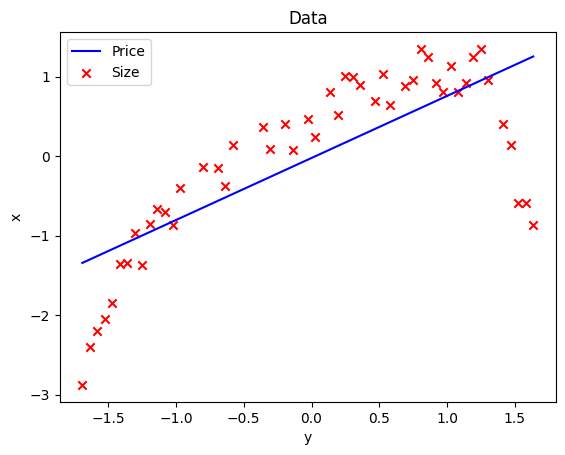

In [137]:

visualize_model_2d(X_train, Y_train, Y_predicted, "Data")

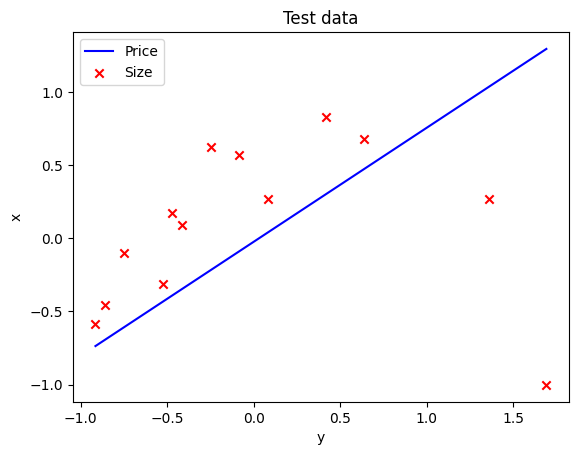

Test R2 score: -1.2773421917836698
Test RMSE: 0.7973351349557218


In [138]:
visualize_model_2d(X_test, Y_test, Y_test_predicted, "Test data")
print_model_score(Y_test, Y_test_predicted, "Test")

# Vytvořte polynominální regresní model
- vytvořte model polynominální 1D model se stupni 2 - 8
- modely zobrazte
- zobrazte jejich parametry
- zobrazte jejich skóre
- Který model byste vybrali?

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [140]:
# Pro nalezení polynomu, kterým lze proložit data použijeme knihovnu numpy. 
# Případně lze použít i knihovna scikit-learn - from sklearn.preprocessing import PolynomialFeatures
def polynomial_fit(X, Y, degree = 1):
    return np.poly1d(np.polyfit(X, Y, degree))

In [141]:
def visualize_model (p, X_train, Y_train, X_test, Y_test, degree, x_label = "Size", y_label = "Price"):              
    fig1 = plt.figure()    
    plt.scatter (X_train, Y_train, c='r', label="Train ")
    plt.scatter (X_test, Y_test, c='b', label="Test ")
    
    curve_x = np.arange(min(X_train), max(max(X_train), max(X_test)), 0.01)    
    plt.plot(curve_x, p(curve_x), label=f"Polynomial of degree {degree}")  
            
    plt.title ("Model")
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

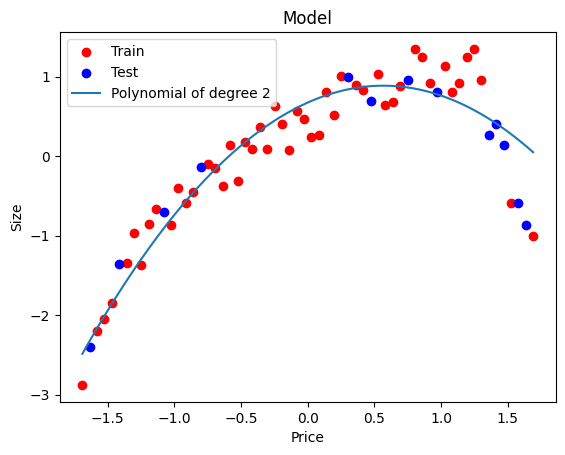

Price  [-0.66255605  0.74958519  0.67432203]
Train R2 score: 0.2719692422683029
Train RMSE: 0.8482775161793008
Test R2 score: 0.2845159083690817
Test RMSE: 0.8216306365206005


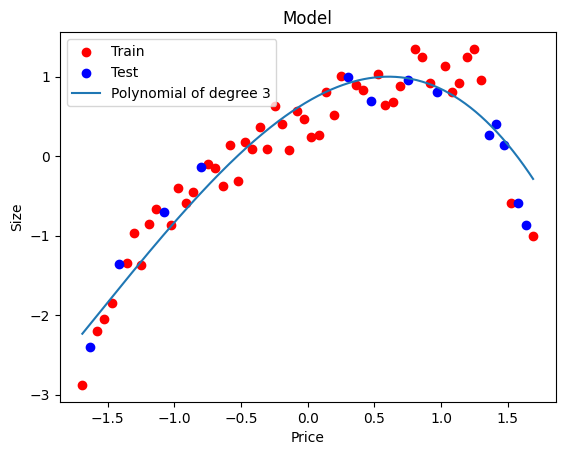

Price  [-0.14184997 -0.68181593  0.98044831  0.68736362]
Train R2 score: 0.6727269292410051
Train RMSE: 0.5687458332162009
Test R2 score: 0.6896972034576251
Test RMSE: 0.541089963556714


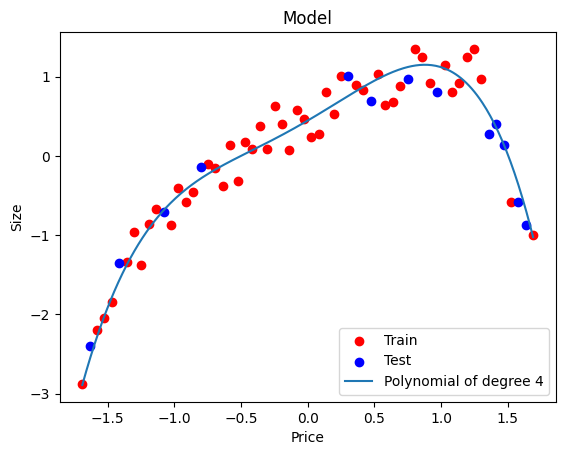

Price  [-0.366869   -0.15279995  0.20623473  0.98607671  0.44524866]
Train R2 score: -7.8671016651182075
Train RMSE: 2.9604241348938443
Test R2 score: -4.852595771188129
Test RMSE: 2.349908208226922


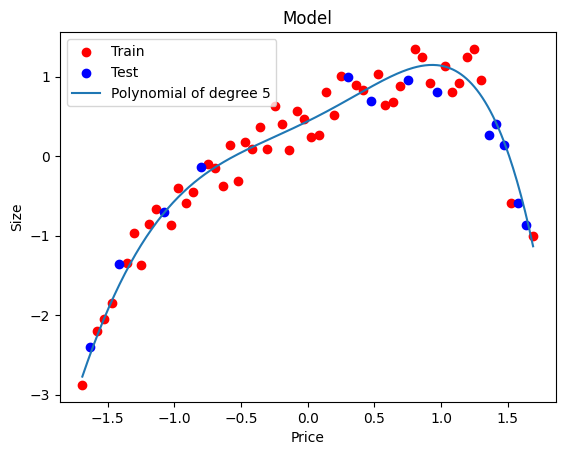

Price  [-0.0766864  -0.36873883  0.09730011  0.21514888  0.83055326  0.43959889]
Train R2 score: -1.6632523171954263
Train RMSE: 1.6224422564642351
Test R2 score: -1.5051599406421787
Test RMSE: 1.5374265011008887


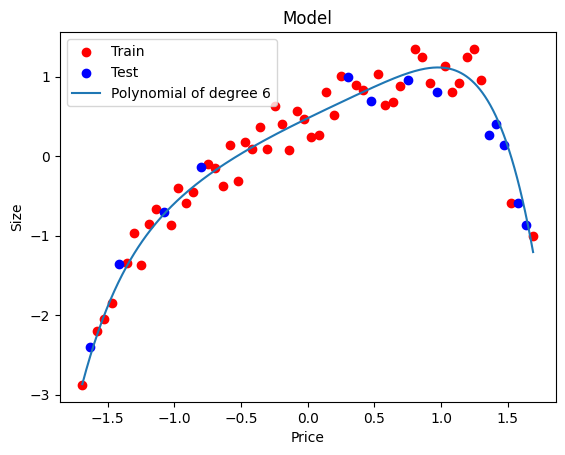

Price  [-0.07802471 -0.08178603 -0.0564413   0.11852538 -0.082897    0.81743243
  0.4775815 ]
Train R2 score: -25.12840937477541
Train RMSE: 5.081823510894949
Test R2 score: -9.761420462547216
Test RMSE: 3.186481737350094


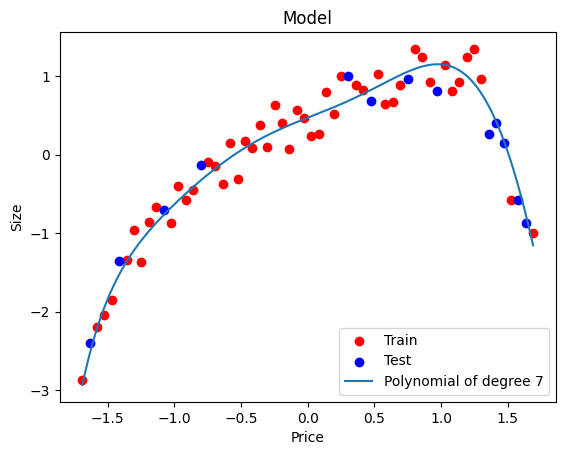

Price  [ 0.07678451 -0.06869483 -0.44233215 -0.0958897   0.58512393 -0.04729776
  0.67228969  0.47154164]
Train R2 score: -195.34621003129556
Train RMSE: 13.930745351754497
Test R2 score: -43.214258665880905
Test RMSE: 6.458888799392268


In [142]:
for degree in range (2, 8):
    p = polynomial_fit(X_train, Y_train, degree)  
    visualize_model (p, X_train, Y_train, X_test, Y_test, degree)    
    print("Price ", p.coef)
    print_model_score(Y_train, p(Y_train), "Train")
    print_model_score(Y_test, p(Y_test), "Test")

Vybral bych druhý model. (Polynomial of degree 3)